In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
from PIL import Image
from IPython.display import display
import io
from google.colab import files
uploaded = files.upload()

Saving bicycle.jpg to bicycle.jpg
Saving drwal.jpg to drwal.jpg
Saving internaziomal.jpg to internaziomal.jpg


Zadanie 4. (2 punkty)
Zdjęcie fotograficzne o rozdzielczości A x B w formacie RGB można traktować jako zbiór N = A * B
trójwymiarowych punktów danych. Po przeprowadzeniu grupowania takich danych, z liczbą grup K,
można obniżyć liczbę kolorów zdjęcia do K (tworząc paletę K kolorów określonych przez środki
uzyskanych grup, a następnie zastępując kolor każdego piksela najbliższym mu kolorem ze
stworzonej palety). Napisz program wczytujący zdjęcie z pliku JPG (polecenie imread w Matlabie
lub w Pythonie), redukujący liczbę kolorów w powyższy sposób i wyświetlający zredukowane
zdjęcie na ekranie. Sprawdź działanie programu na 5 wybranych przez siebie zdjęciach. 

In [0]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=1)

def mean(X):
    return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K, maxiter=100):
  change = True
  itr = 0
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:
    if itr == maxiter:
      break
    itr += 1       
    change = False
    groups = np.argmin(dist(scope, centroids), axis=1)
    if np.array_equal(groups, target):
      continue
    change = True  
    target = groups
    for k in range(K):
      if scope[target==k].size == 0:
        continue
      centroids[k] = mean(scope[target==k])
  return centroids, target, itr

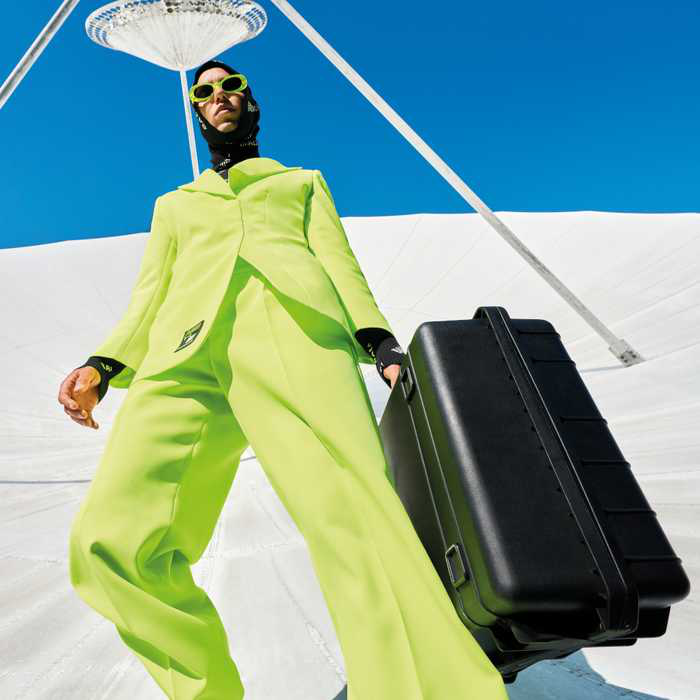

czas:  4.9583752155303955 iteracje:  30


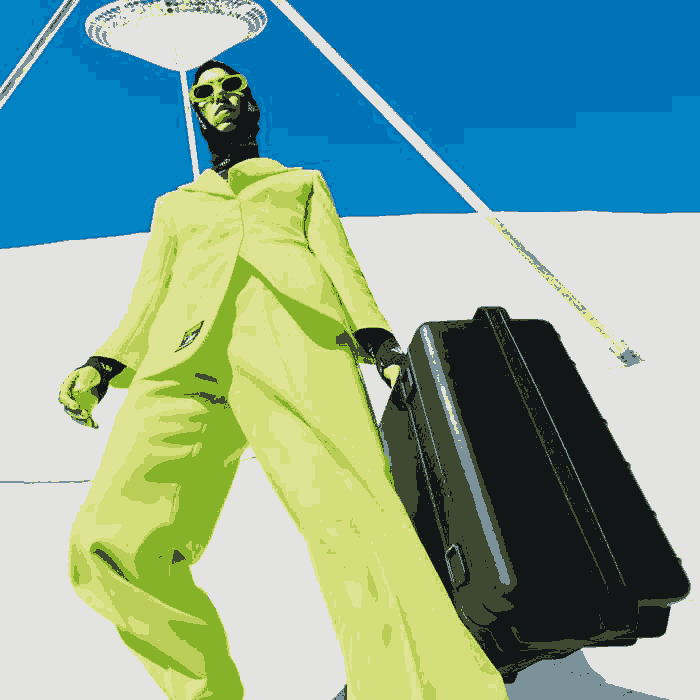

In [7]:

#display(Image.fromarray(im, 'RGB'))
images = ['internaziomal.jpg', 'drwal.jpg', 'bicycle.jpg']
def kompresja(name, k):
  image = np.array(Image.open(io.BytesIO(uploaded[name])))
  display(Image.fromarray(image, 'RGB'))
  shape = image.shape
  image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
  czas = time.time()
  colors, target, itr = kMeans(image, k)
  print('czas: ', time.time() - czas, 'iteracje: ', itr)
  #train = image.copy()
  for i in range (k):
    image[target==i]=colors[i]
  image = image.reshape(shape)
  display(Image.fromarray(image, 'RGB'))
kompresja(images[0], 10)

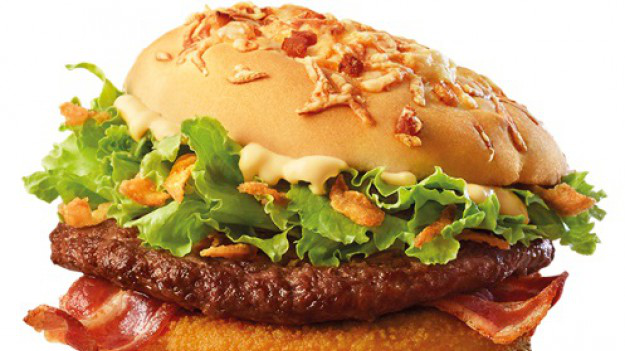

czas:  6.958312034606934 iteracje:  100


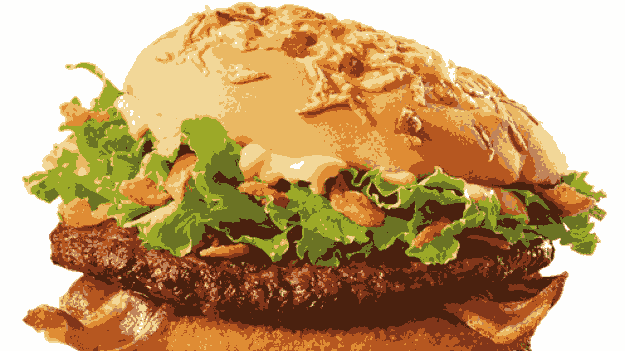

In [166]:
kompresja(images[1], 10)

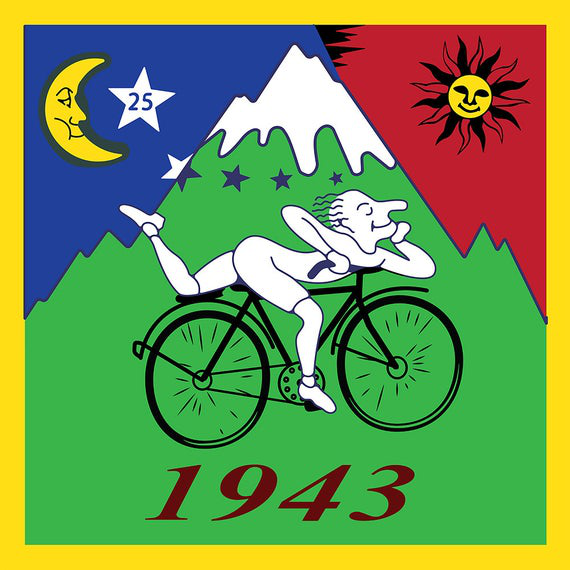

czas:  3.0136327743530273 iteracje:  29


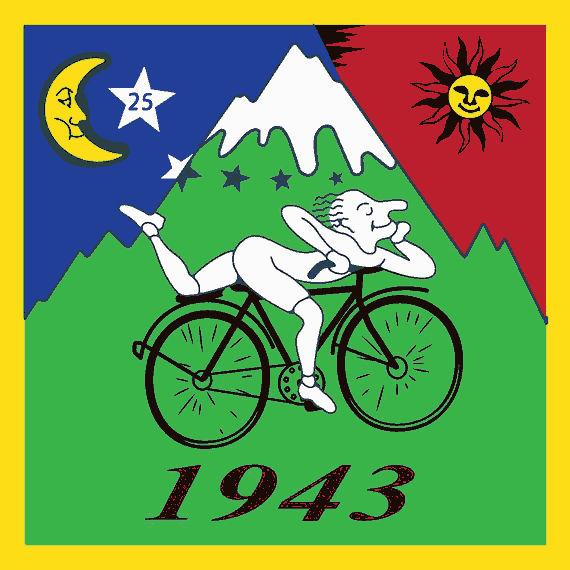

In [167]:
kompresja(images[2], 10)